<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Aranzazú Rendón Gómez, Diego Pintor.
    
**Fecha:** 12 de marzo del 2021.

**Expediente:** 722272, .
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 7: Clase 13

## Enunciado Tarea

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.

In [2]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

### Respuesta Pintor

In [28]:
#Función Estratificadora
def estratificar(N: 'Número de estratos a crear'):
    """
    Función creadora de estratos para el método de estratificación. Recibe N número de estratos a crear.
    Crea 3 variables para el método de estratificación (U + i)/B, donde B es la cantidad total de estratos a crear,
    i es la variable iterable sobre los B estratos totales y U es la variable aleatoria uniforme a estratificar.
    Regresa un array con las variables aleatorias estratificadas.
    """
    B = np.array([j for j in N]) # B estratos
    i = np.array([np.arange(0,j) for j in N]) # Iteración sobre los estratos
    U = np.array([np.random.rand(j) for j in N])  # Variables aleatorias uniformes de N términos
    return (U + i)/B

### Respuesta Aranzazú

2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
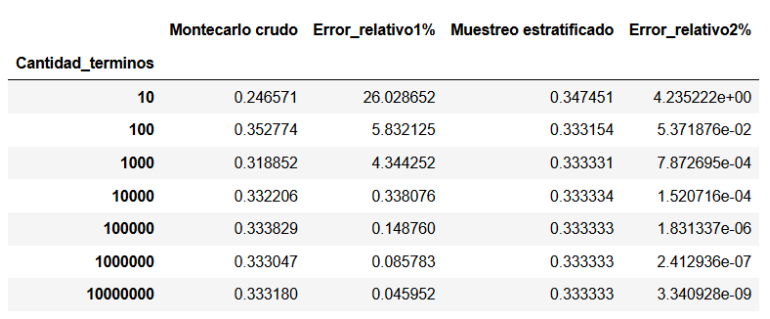

### Respuesta Pintor

In [29]:
# Método montecarlo crudo
# Función de integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))
# Intervalo de integración
a, b = 0,1
# Integral exacta
I = 1/3
# Términos en escala logarítmica
N = np.logspace(1,7,7,dtype=int)
# DataFrame para mostrar los resultados de la integración
df = pd.DataFrame(index=N,columns=['Valor_aproximacion', 'Error_relativo1%'], dtype='float')
df.index.name = "Cantidad_terminos"
# Variables aleatorias uniformes para la integral
ui = list(map(lambda N:np.random.uniform(a,b,N),N))
# Función a evaluar mediante montecarlo
f = lambda x: x**2
# Aproximando función mediante términos y montecarlo
I_m = list(map(lambda Y:int_montecarlo(f,a,b,Y),ui))
# Pasando datos a la tabla
df.loc[N,"Valor_aproximacion"] = I_m
# Calculando el error relativo obtenido
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Valor_aproximacion"]-I)*100/I
df

,Valor_aproximacion,Error_relativo1%
Cantidad_terminos,,
10,0.380441,14.132436
100,0.351701,5.510253
1000,0.338398,1.519344
10000,0.330157,0.953006
100000,0.333954,0.186321
1000000,0.333294,0.011790
10000000,0.333543,0.062857


In [30]:
# Método estratificado
muestra = estratificar(N) #Llamando a la función estratificadora
# Creando lista de ejecución para los valores finales del montecarlo
I_m_E = list(map(lambda Y: int_montecarlo(f,a,b,Y),muestra))
# Tabla final comparando montecarlo estratificado vs montecarlo crudo
df["Muestreo_Estratificado"] = I_m_E
df["Error_relativo2%"] = np.abs(df.loc[N,"Muestreo_Estratificado"]-I)*100/I
df

,Valor_aproximacion,Error_relativo1%,Muestreo_Estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.380441,14.132436,0.336672,1.001598e+00
100,0.351701,5.510253,0.333441,3.222016e-02
1000,0.338398,1.519344,0.333353,5.905495e-03
10000,0.330157,0.953006,0.333333,8.109314e-05
100000,0.333954,0.186321,0.333333,5.459879e-06
1000000,0.333294,0.011790,0.333333,1.321461e-07
10000000,0.333543,0.062857,0.333333,2.023881e-09


### Respuesta Aranzazú